In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.layers import Dense, LSTM, Dropout, Flatten
from keras.models import Sequential

Using TensorFlow backend.
C:\Users\okape\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\okape\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\okape\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\okape\Anaconda3\envs\te

In [20]:
stock = pd.read_html('https://kabuoji3.com/stock/1333/', index_col='日付', parse_dates=True)

In [21]:
stock[0]

,始値,高値,安値,終値,出来高,終値調整
日付,,,,,,
2020-08-26,2294,2294,2265,2276,133300,2276
2020-08-25,2265,2290,2257,2271,217100,2271
2020-08-24,2255,2255,2228,2228,126100,2228
2020-08-21,2270,2291,2255,2255,86600,2255
2020-08-20,2274,2285,2262,2276,88000,2276
...,...,...,...,...,...,...
2020-01-15,2740,2766,2737,2754,140800,2754
2020-01-14,2771,2771,2739,2759,236400,2759
2020-01-10,2765,2773,2753,2755,175400,2755


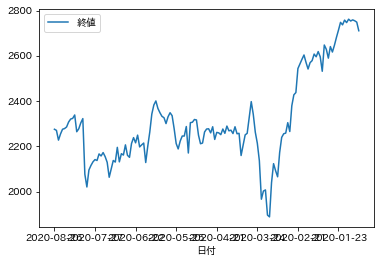

In [13]:
stock[0].plot(x='日付', y='終値')

In [22]:
#stock[0]とstock[1]に分断されて格納されている
data = stock[0].drop(['始値', '高値', '安値', '出来高', '終値調整'], axis=1)

In [23]:
data

,終値
日付,
2020-08-26,2276
2020-08-25,2271
2020-08-24,2228
2020-08-21,2255
2020-08-20,2276
...,...
2020-01-15,2754
2020-01-14,2759
2020-01-10,2755


In [35]:
model_1 = Sequential()
model_1.add(Dense(5, activation='relu', input_shape=(100, )))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='linear'))

model_1.summary()
model_1.compile(optimizer='adam',
           loss='mse', # 平均二乗誤差
           metrics=['mae']) # 平均絶対誤差


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 5)                 505       
_________________________________________________________________
dropout_7 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_2 = Sequential()
model_2.add(LSTM(10,
             dropout=0.2,
             recurrent_dropout=0.2,
             input_shape=(150,1)))
model_2.add(Dense(5, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='linear'))
model_2.summary()
model_2.compile(optimizer='adam',
           loss='mse',
           metrics=['mae'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 55        
_________________________________________________________________
dropout_6 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 6         
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [30]:
def getInputLabel(data, period=100):
 period = period
 input_tensor = []
 label_tensor = []
 for i in range(0, len(data) - period, 1):
     input_tensor.append(data.values[i:i + period,0])
     label_tensor.append(data.values[i + period,0])
 input_tensor = np.array(input_tensor)
 label_tensor = np.array(label_tensor)
 return input_tensor, label_tensor

In [31]:
tmp = data - data.mean()
tmp = tmp/data.std()
print('tmp: ' + str(tmp))
input_tensor, label_tensor = getInputLabel(data = tmp)

tmp:                   終値
日付                  
2020-08-26 -0.197099
2020-08-25 -0.222524
2020-08-24 -0.441175
2020-08-21 -0.303882
2020-08-20 -0.197099
...              ...
2020-01-15  2.233486
2020-01-14  2.258910
2020-01-10  2.238571
2020-01-09  2.208061
2020-01-08  2.014835

[151 rows x 1 columns]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(input_tensor, label_tensor, test_size=0.2, shuffle = False)

In [33]:
earlystopping = EarlyStopping(monitor='loss', patience=5)

In [36]:
model_1.fit(X_train, y_train, batch_size=10, epochs=50, callbacks=[earlystopping])

Epoch 1/50
40/40 [==============================] - 229s 6s/step - loss: 2.5844 - mean_absolute_error: 1.4122
Epoch 2/50
40/40 [==============================] - 0s 750us/step - loss: 1.6332 - mean_absolute_error: 1.1331
Epoch 3/50
40/40 [==============================] - 0s 775us/step - loss: 1.8741 - mean_absolute_error: 1.1675
Epoch 4/50
40/40 [==============================] - 0s 775us/step - loss: 1.9142 - mean_absolute_error: 1.1700
Epoch 5/50
40/40 [==============================] - 0s 425us/step - loss: 1.3903 - mean_absolute_error: 0.9821
Epoch 6/50
40/40 [==============================] - 0s 725us/step - loss: 1.2867 - mean_absolute_error: 0.9196
Epoch 7/50
40/40 [==============================] - 0s 838us/step - loss: 1.3134 - mean_absolute_error: 0.9824
Epoch 8/50
40/40 [==============================] - 0s 805us/step - loss: 1.1203 - mean_absolute_error: 0.9235
Epoch 9/50
40/40 [==============================] - 0s 691us/step - loss: 0.9975 - mean_absolute_error: 0.8495
Ep

In [39]:
loss_and_metrics = model_1.evaluate(X_test, y_test, batch_size=50)

11/11 [==============================] - 4s 385ms/step


In [40]:
loss_and_metrics

[3.199496269226074, 1.7177249193191528]

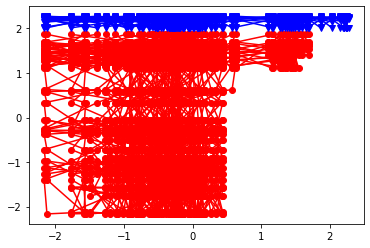

In [41]:
# epochを重ねるごとにロスが下がっていることを可視化
# predictでXをリスト化、それぞれの予測値を可視化



In [42]:
predict = model_1.predict(X_test, batch_size=30)

In [43]:
predict

array([[ 1.2507288 ],
       [ 1.260792  ],
       [ 0.88710237],
       [ 0.5916683 ],
       [ 0.4436855 ],
       [ 0.3489315 ],
       [ 0.2504832 ],
       [ 0.15943633],
       [ 0.23266669],
       [-0.308178  ],
       [ 0.04756297]], dtype=float32)

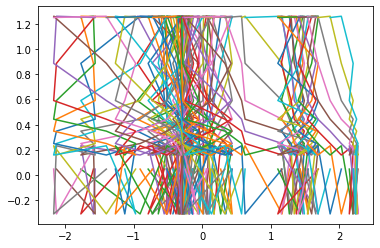

In [46]:
plt.plot(X_test, predict)